In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
train_data_path = '/content/drive/MyDrive/Cotton plant disease prediction/train'
valid_data_path  =  '/content/drive/MyDrive/Cotton plant disease prediction/val'

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [8]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')

Found 1951 images belonging to 4 classes.


In [9]:
training_data.image_shape

(150, 150, 3)

In [10]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [11]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
valid_data = valid_datagen.flow_from_directory(valid_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


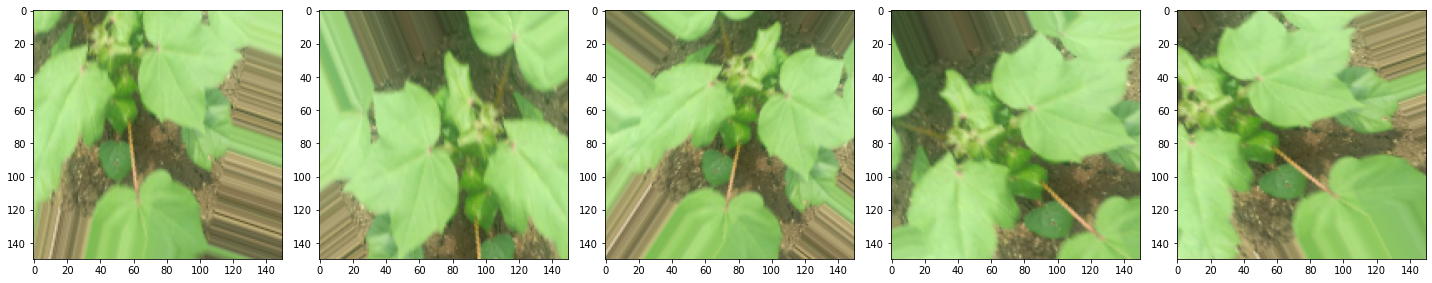

In [13]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [14]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
                                     ])

In [15]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_path = '/content/drive/MyDrive/Cotton plant disease prediction/cpdp.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/50
61/61 [==============================] - 673s 11s/step - loss: 1.3163 - accuracy: 0.4158 - val_loss: 1.1450 - val_accuracy: 0.4352

Epoch 00001: val_accuracy improved from -inf to 0.43519, saving model to /content/drive/MyDrive/Cotton plant disease prediction/cpdp.h5
Epoch 2/50
61/61 [==============================] - 24s 390ms/step - loss: 1.1090 - accuracy: 0.5171 - val_loss: 0.9827 - val_accuracy: 0.5556

Epoch 00002: val_accuracy improved from 0.43519 to 0.55556, saving model to /content/drive/MyDrive/Cotton plant disease prediction/cpdp.h5
Epoch 3/50
61/61 [==============================] - 24s 386ms/step - loss: 0.9959 - accuracy: 0.5828 - val_loss: 0.9703 - val_accuracy: 0.5617

Epoch 00003: val_accuracy improved from 0.55556 to 0.56173, saving model to /content/drive/MyDrive/Cotton plant disease prediction/cpdp.h5
Epoch 4/50
61/61 [==============================] - 24s 389ms/step - loss: 0.9166 - accuracy: 0.6153 - val_loss: 1.1495 - val_accuracy: 0.5216

Epoch 00004

In [18]:
history.history

{'accuracy': [0.4449000656604767,
  0.5397232174873352,
  0.5909789800643921,
  0.6417222023010254,
  0.6514607667922974,
  0.6694003343582153,
  0.668887734413147,
  0.6929779648780823,
  0.6981035470962524,
  0.6981035470962524,
  0.7088672518730164,
  0.7283444404602051,
  0.7350077033042908,
  0.7488467693328857,
  0.7421835064888,
  0.7724243998527527,
  0.7842132449150085,
  0.7944643497467041,
  0.7970271706581116,
  0.7806253433227539,
  0.8052281141281128,
  0.8134289979934692,
  0.8318811058998108,
  0.8170168995857239,
  0.8252178430557251,
  0.8441824913024902,
  0.8380317687988281,
  0.8349564075469971,
  0.8390569090843201,
  0.8339313268661499,
  0.8416196703910828,
  0.8431573510169983,
  0.8549461960792542,
  0.8692978024482727,
  0.8493080735206604,
  0.8723731637001038,
  0.8631470799446106,
  0.8616094589233398,
  0.8559712767601013,
  0.8703228831291199,
  0.8739108443260193,
  0.879548966884613,
  0.8662224411964417,
  0.8723731637001038,
  0.8651973605155945,
  0

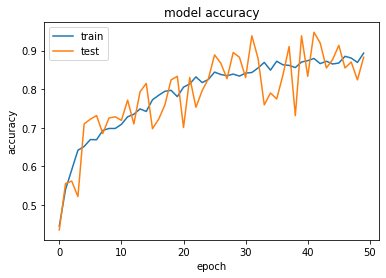

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

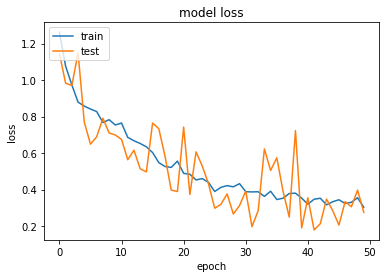

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()